In [11]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

frames = [pd.read_csv(data) for data in glob('../coding-time_*/*/coding-time.csv')]
data = pd.concat(frames, ignore_index=True)
data['code'] = data.apply(lambda r: f'({r["chunk_n"]}, {r["chunk_k"]}) ({r["fragment_n"]}, {r["fragment_k"]})', axis=1)
data

,chunk_k,chunk_n,fragment_k,fragment_n,op,time,code
0,8,10,16,40,encode,16.986526,"(10, 8) (40, 16)"
1,8,10,16,40,decode,13.958893,"(10, 8) (40, 16)"
2,8,10,16,40,repair,0.737752,"(10, 8) (40, 16)"
3,8,10,32,80,encode,15.435767,"(10, 8) (80, 32)"
4,8,10,32,80,decode,11.966225,"(10, 8) (80, 32)"
...,...,...,...,...,...,...,...
175,8,10,32,80,decode,11.749007,"(10, 8) (80, 32)"
176,8,10,32,80,repair,0.473830,"(10, 8) (80, 32)"
177,12,15,32,80,encode,17.375528,"(15, 12) (80, 32)"
178,12,15,32,80,decode,14.065696,"(15, 12) (80, 32)"


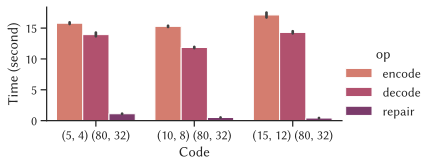

In [12]:
# palette = sns.color_palette('flare', n_colors=5)
sns.catplot(data=data[data["fragment_n"] == 80],
    kind="bar",
    order=["(5, 4) (80, 32)", "(10, 8) (80, 32)", "(15, 12) (80, 32)"],
    x="code", y="time", hue="op", 
    palette='flare',
    height=2.56, aspect=2.) \
.set_xlabels("Code") \
.set_ylabels("Time (second)") \
.savefig("coding-time-outer.pdf")

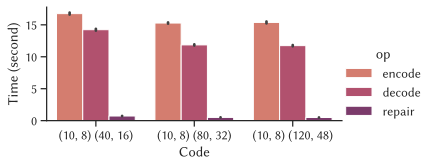

In [13]:
sns.catplot(data=data[data["chunk_n"] == 10],
    kind="bar",
    order=["(10, 8) (40, 16)", "(10, 8) (80, 32)", "(10, 8) (120, 48)"],
    x="code", y="time", hue="op", 
    palette='flare',
    height=2.56, aspect=2.) \
.set_xlabels("Code") \
.set_ylabels("Time (second)") \
.savefig("coding-time-inner.pdf")